In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras import layers as ly
# !pip install split-folders
import splitfolders # or import splitfolders
import pathlib
import matplotlib.image as img

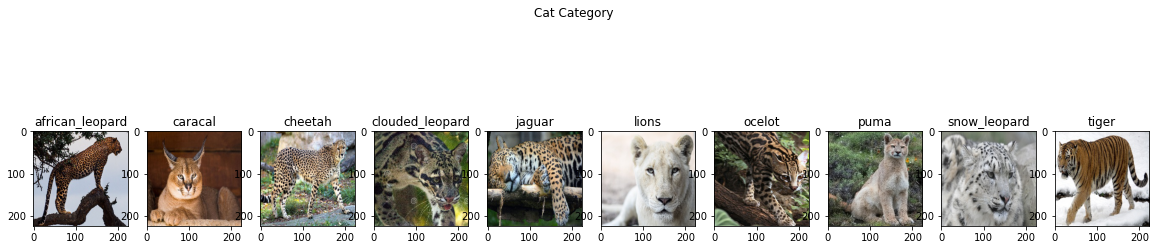

In [7]:
data_dir = "./dataset/train/" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir
african_leopard = list(data_dir.glob('AFRICAN LEOPARD/*'))
caracal = list(data_dir.glob('CARACAL/*'))
cheetah = list(data_dir.glob('CHEETAH/*'))
clouded_leopard = list(data_dir.glob('CLOUDED LEOPARD/*'))
jaguar = list(data_dir.glob('JAGUAR/*'))
lions = list(data_dir.glob('LIONS/*'))
ocelot = list(data_dir.glob('OCELOT/*'))
puma = list(data_dir.glob('PUMA/*'))
snow_leopard = list(data_dir.glob('SNOW LEOPARD/*'))
tiger = list(data_dir.glob('TIGER/*'))
fig, ax = plt.subplots(ncols= 10, nrows = 1, figsize=(20,5))
fig.suptitle('Cat Category')

african_leopard_image = img.imread(african_leopard[0])
caracal_image = img.imread(caracal[0])
cheetah_image = img.imread(cheetah[0])
clouded_leopard_image = img.imread(clouded_leopard[0])
jaguar_image = img.imread(jaguar[0])
lions_image = img.imread(lions[0])
ocelot_image = img.imread(ocelot[0])
puma_image = img.imread(puma[0])
snow_leopard_image = img.imread(snow_leopard[0])
tiger_image = img.imread(tiger[0])


ax[0].set_title('african_leopard')
ax[1].set_title('caracal')
ax[2].set_title('cheetah')
ax[3].set_title('clouded_leopard')
ax[4].set_title('jaguar')
ax[5].set_title('lions')
ax[6].set_title('ocelot')
ax[7].set_title('puma')
ax[8].set_title('snow_leopard')
ax[9].set_title('tiger')



ax[0].imshow(african_leopard_image)
ax[1].imshow(caracal_image)
ax[2].imshow(cheetah_image)
ax[3].imshow(clouded_leopard_image)
ax[4].imshow(jaguar_image)
ax[5].imshow(lions_image)
ax[6].imshow(ocelot_image)
ax[7].imshow(puma_image)
ax[8].imshow(snow_leopard_image)
ax[9].imshow(tiger_image)

In [43]:
# Каталог с данными для обучения
train_dir = 'train'
# Каталог с данными для проверки
val_dir = 'val'
# Каталог с данными для тестирования
test_dir = 'test'
# Размеры изображения
# Размер мини-выборки
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
# Количество изображений для обучения
nb_train_samples = 2339
# Количество изображений для проверки
nb_validation_samples = 50
# Количество изображений для тестирования
nb_test_samples = 50

In [11]:
# train_df = keras.utils.image_dataset_from_directory("dataset/train",
#                                          batch_size=BATCH_SIZE,
#                                          image_size=IMG_SIZE,
#                                          seed=42)
# valid_df = keras.utils.image_dataset_from_directory("dataset/valid", 
#                                          batch_size=BATCH_SIZE,
#                                          image_size=IMG_SIZE,
#                                           seed=42)
# test_df = keras.utils.image_dataset_from_directory("dataset/test", 
#                                          batch_size=BATCH_SIZE,
#                                          image_size=IMG_SIZE,
#                                          seed=42)

Found 2339 files belonging to 10 classes.
Found 50 files belonging to 10 classes.
Found 50 files belonging to 10 classes.


In [44]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [45]:
train_generator = datagen.flow_from_directory(
    "dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 2339 images belonging to 10 classes.


In [46]:
val_generator = datagen.flow_from_directory(
    "dataset/valid",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 50 images belonging to 10 classes.


In [47]:
test_generator  = datagen.flow_from_directory(
    "dataset/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 50 images belonging to 10 classes.


In [48]:
vgg16_net = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16_net.trainable = False
vgg16_net.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [49]:
model = Sequential()
# Добавляем в модель сеть VGG16 вместо слоя
model.add(vgg16_net)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               6422784   
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 21,140,042
Trainable params: 6,425,354
N

In [51]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-5), 
              metrics=['accuracy'])

In [52]:
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // BATCH_SIZE,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/5
73/73 [==============================] - 266s 4s/step - loss: 2.3669 - accuracy: 0.1678 - val_loss: 1.8464 - val_accuracy: 0.4375
Epoch 2/5
73/73 [==============================] - 272s 4s/step - loss: 1.8032 - accuracy: 0.3923 - val_loss: 1.6083 - val_accuracy: 0.5000
Epoch 3/5
73/73 [==============================] - 280s 4s/step - loss: 1.4943 - accuracy: 0.5141 - val_loss: 1.3702 - val_accuracy: 0.6250
Epoch 4/5
73/73 [==============================] - 278s 4s/step - loss: 1.2752 - accuracy: 0.5982 - val_loss: 1.1598 - val_accuracy: 0.6562
Epoch 5/5
73/73 [==============================] - 272s 4s/step - loss: 1.1134 - accuracy: 0.6472 - val_loss: 1.0536 - val_accuracy: 0.6875


In [54]:
scores = model.evaluate_generator(test_generator, nb_test_samples // BATCH_SIZE)

C:\Users\CHILLO~1\AppData\Local\Temp/ipykernel_19784/2917459760.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // BATCH_SIZE)


In [55]:
print("accuracy на тестовых данных: %.2f%%" % (scores[1]*100))

accuracy на тестовых данных: 87.50%
